# BOREWELL ACCIDENTS - TIME SERIES ANALYSIS 

###### According National Disaster Response Force [NDRF] borewell accidents in India has considerably raised for the past 5 years. News article has detailed reports of borewell accidents.However, even until the recent times, no technological solution has been proposed to stop these accidents from occuring. All these reports have one thing in common, all have stated that the children fall into these borewells while they play outside in open-lands. 

This analysis will allow us to understand the pattern at which these accidents occur over a period of time. The rule of thumb is to collect a minimum of 20 observation. This Data is collected over reading various reports/ new articles/reports available over the internet. 

### DATA EXTRACTION

In [ ]:
#Mount GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the data using pandas library
import pandas as pd

borewell_accident_df = pd.read_csv('/content/drive/MyDrive/G-Chart/Accidents_Borewell.csv')

print(borewell_accident_df) 

               Victim's Name   Age           State  Month  Year  \
0                 Rahul Sahu  11.0       New Delhi      6  2010   
1                     Rithik   6.0          Punjab      5  2010   
2              Sujith Wilson   3.0      Tamil Nadu     10  2019   
3            Fatehveer Singh   2.0          Punjab      6  2019   
4                      Seema   4.0       Rajasthan      4  2019   
5                R Madhumita   3.0      Tamil Nadu      4  2014   
6                   D Sujith   2.0      Tamil Nadu     10  2014   
7                       Anil   4.0       Rajasthan      5  2021   
8                    Pradeep   5.0   Uttar Pradesh      6  2019   
9                       Mahi   5.0         Haryana      6  2012   
10               Dinnaj Kaur   3.0          Punjab      6  2010   
11      Prince Kumar Kashyap   5.0         Haryana      7  2006   
12               Sai Barhate   7.0     Maharashtra      5  2017   
13  Ritesh Jawasingh Solanki   6.0     Maharashtra      6  202

### DATA CLEANING

In [ ]:
#Name of the borewell accident victim's does not contribute to our analysis therefore, lets remove it. 
borewell_accident_df = borewell_accident_df.drop(columns=["Victim's Name"])
#print the first 5 rows in dataframe
borewell_accident_df

,Age,State,Month,Year,Depth of borewell (ft),Rescue Time (Hr),Survival Rate
0,11.0,New Delhi,6,2010,80,104,Survived
1,6.0,Punjab,5,2010,300,7,Died
2,3.0,Tamil Nadu,10,2019,88,82,Died
3,2.0,Punjab,6,2019,120,109,Died
4,4.0,Rajasthan,4,2019,440,14,Died
5,3.0,Tamil Nadu,4,2014,500,19,Died
6,2.0,Tamil Nadu,10,2014,200,24,Died
7,4.0,Rajasthan,5,2021,90,16,Survived
8,5.0,Uttar Pradesh,6,2019,100,9,Survived
9,5.0,Haryana,6,2012,70,90,Died


In [ ]:
# Data cleaning is the fundamental step in Data processing. Eventhough, its visually proven that the data is clean,
#Let us perform basic preprocessing step. 

# checking zeros
print('Columns With Zero')
print((borewell_accident_df == 0).sum())

Columns With Zero
Age                       0
 State                    0
Month                     0
Year                      0
Depth of borewell (ft)    0
Rescue Time (Hr)          0
Survival Rate             0
dtype: int64


In [ ]:
# checking for nulls
print('Columns With Nulls')
print(borewell_accident_df.isnull().sum())

Columns With Nulls
Age                       0
 State                    0
Month                     0
Year                      0
Depth of borewell (ft)    0
Rescue Time (Hr)          0
Survival Rate             0
dtype: int64


 No data columns has zero and null values

In [ ]:
# Replace survival rate to binary values
# Applying the condition
borewell_accident_df.loc[borewell_accident_df["Survival Rate"] == "Died", "Survival Rate"] = 0
borewell_accident_df.loc[borewell_accident_df["Survival Rate"] == "Survived", "Survival Rate"] = 1
borewell_accident_df

,Age,region,Month,Year,Depth of borewell (ft),Rescue Time (Hr),Survival Rate
0,11.0,New Delhi,6,2010,80,104,1
1,6.0,Punjab,5,2010,300,7,0
2,3.0,Tamil Nadu,10,2019,88,82,0
3,2.0,Punjab,6,2019,120,109,0
4,4.0,Rajasthan,4,2019,440,14,0
5,3.0,Tamil Nadu,4,2014,500,19,0
6,2.0,Tamil Nadu,10,2014,200,24,0
7,4.0,Rajasthan,5,2021,90,16,1
8,5.0,Uttar Pradesh,6,2019,100,9,1
9,5.0,Haryana,6,2012,70,90,0


In [ ]:
print(borewell_accident_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     21 non-null     float64
 1   region                  21 non-null     object 
 2   Month                   21 non-null     int64  
 3   Year                    21 non-null     int64  
 4   Depth of borewell (ft)  21 non-null     int64  
 5   Rescue Time (Hr)        21 non-null     int64  
 6   Survival Rate           21 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.3+ KB
None


In [ ]:
#change state column name to region
borewell_accident_df.columns = borewell_accident_df.columns.str.replace(' State','region')
borewell_accident_df

,Age,region,Month,Year,Depth of borewell (ft),Rescue Time (Hr),Survival Rate
0,11.0,New Delhi,6,2010,80,104,1
1,6.0,Punjab,5,2010,300,7,0
2,3.0,Tamil Nadu,10,2019,88,82,0
3,2.0,Punjab,6,2019,120,109,0
4,4.0,Rajasthan,4,2019,440,14,0
5,3.0,Tamil Nadu,4,2014,500,19,0
6,2.0,Tamil Nadu,10,2014,200,24,0
7,4.0,Rajasthan,5,2021,90,16,1
8,5.0,Uttar Pradesh,6,2019,100,9,1
9,5.0,Haryana,6,2012,70,90,0


In [ ]:
#Convert object dtype to int dtype
borewell_accident_df['Survival Rate'] = borewell_accident_df['Survival Rate'].astype(str).astype(int)

In [ ]:
#Convert object dtype to int dtype
borewell_accident_df['Age'] = borewell_accident_df['Age'].astype(float).astype(int)

In [ ]:
# overview of the dataframe
print(borewell_accident_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     21 non-null     int64 
 1   region                  21 non-null     object
 2   Month                   21 non-null     int64 
 3   Year                    21 non-null     int64 
 4   Depth of borewell (ft)  21 non-null     int64 
 5   Rescue Time (Hr)        21 non-null     int64 
 6   Survival Rate           21 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.3+ KB
None


### VISUALIZATION

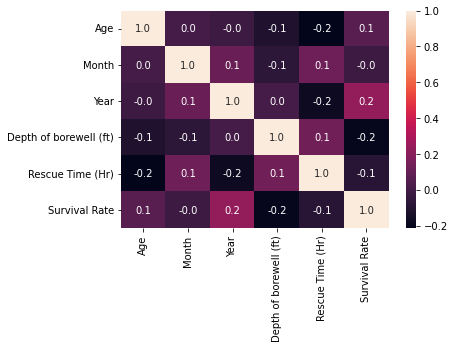

In [ ]:
# plotting correlation from dataframe 
import seaborn as sns 

borewell_accident_df.corr()
sns.heatmap(borewell_accident_df.corr(method="kendall"), annot=True,fmt='0.1f')

In [ ]:
borewell_accident_df.region

0          New Delhi
1             Punjab
2         Tamil Nadu
3             Punjab
4          Rajasthan
5         Tamil Nadu
6         Tamil Nadu
7          Rajasthan
8      Uttar Pradesh
9            Haryana
10            Punjab
11           Haryana
12       Maharashtra
13       Maharashtra
14       Maharashtra
15           Haryana
16    Madhya Pradesh
17              Agra
18    Madhya Pradesh
19         Karnataka
20     Uttar Pradesh
Name: region, dtype: object

In [ ]:
#Top states with accidents 

region_by_accident = borewell_accident_df.region.value_counts()
region_by_accident[:20]

Punjab            3
Tamil Nadu        3
Haryana           3
Maharashtra       3
Rajasthan         2
Uttar Pradesh     2
Madhya Pradesh    2
New Delhi         1
Agra              1
Karnataka         1
Name: region, dtype: int64

In [ ]:
region_by_accident[:20].plot(kind = 'barh')

NameError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb7b43c130>,
      dtype=object)

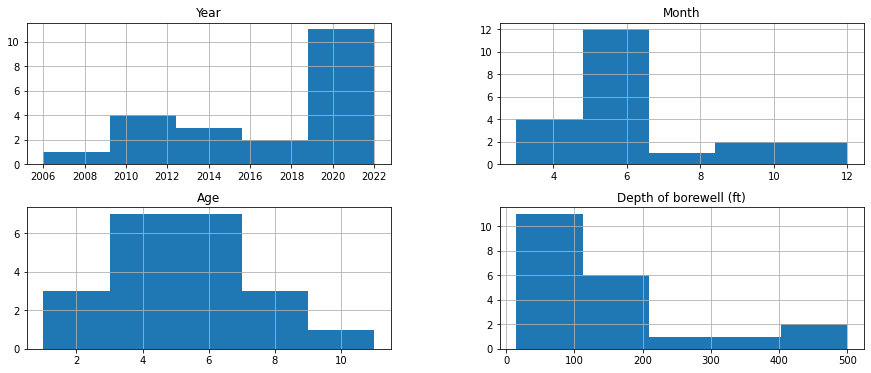

In [ ]:
#Histogram for distribution of numerical data, (ex: year, month, age, depth of borewell)
%matplotlib inline
borewell_accident_df.hist(column=['Year','Month','Age','Depth of borewell (ft)'],bins=5, figsize=(15,6))

In [ ]:
Depth_in_region = borewell_accident_df.drop(["Age","Month","Year","Rescue Time (Hr)","Survival Rate"],axis=1)
Depth_in_region

,region,Depth of borewell (ft)
0,New Delhi,80
1,Punjab,300
2,Tamil Nadu,88
3,Punjab,120
4,Rajasthan,440
5,Tamil Nadu,500
6,Tamil Nadu,200
7,Rajasthan,90
8,Uttar Pradesh,100
9,Haryana,70


In [ ]:
# Use column names of df for the different parameters x, y, color, ...
import plotly.express as px
Plot_RDepth = px.scatter(Depth_in_region, x="Depth of borewell (ft)", y="region",
                 title="Depth of borewells in various regions in India", 
                )

Plot_RDepth.show()

##### According to the rules and regulation of Government of India the maximum depth of borewell can be not more than 196,85 feet. From the above graph we can conclude that the depth of the borewells for various regions has violated the regulations. 

   Survival Rate  Depth of borewell (ft)
1              1               96.250000
0              0              193.692308
 
If survival rate is 0, it represents death
If survival rate is 1, it represents survival
 


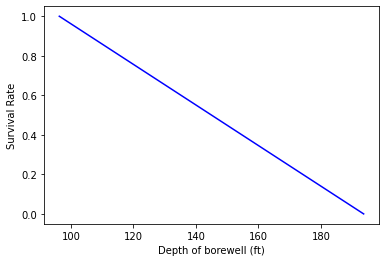

In [ ]:
#Plot a line graph to demonstrate survival rate wrt depth of the borewell
SurvivalRate_depth = borewell_accident_df.groupby('Survival Rate').mean().reset_index().drop(["Age","Month","Year","Rescue Time (Hr)"],axis=1).sort_values(by='Depth of borewell (ft)',ascending=True)
print(SurvivalRate_depth)
print(" ")
print("If survival rate is 0, it represents death")
print("If survival rate is 1, it represents survival")
print(" ")
sns.lineplot(x='Depth of borewell (ft)',y='Survival Rate',data=SurvivalRate_depth,color='BLUE')

##### This analysis also proves that the death rate of children shows a steady increase when the depth of the borewells is more.

    Rescue Time (Hr)         Year  Survival Rate
12               104  2010.000000            1.0
7                 24  2012.000000            0.0
11                90  2012.000000            0.0
8                 48  2012.500000            1.0
6                 19  2014.000000            0.0
14               192  2014.000000            0.0
0                  7  2014.666667            0.0
4                 14  2019.000000            0.0
10                82  2019.000000            0.0
13               109  2019.000000            0.0
2                  9  2020.000000            1.0
3                 10  2020.000000            0.0
5                 16  2021.000000            1.0
1                  8  2022.000000            1.0
9                 80  2022.000000            0.0
 
If survival rate is 0, it represents death
If survival rate is 1, it represents survival
 


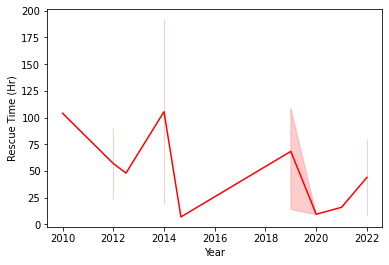

In [ ]:
# Plot a line graph for rescue time as per year 
RescueTime_Year = borewell_accident_df.groupby('Rescue Time (Hr)').mean().reset_index().drop(["Age","Month","Depth of borewell (ft)"],axis=1).sort_values(by='Year',ascending=True)
print(RescueTime_Year)
print(" ")
print("If survival rate is 0, it represents death")
print("If survival rate is 1, it represents survival")
print(" ")
sns.lineplot(x='Year',y='Rescue Time (Hr)',data=RescueTime_Year,color='RED')

    Rescue Time (Hr)  Month  Survival Rate
4                 14    4.0            0.0
6                 19    4.0            0.0
14               192    4.0            0.0
0                  7    5.0            0.0
8                 48    5.0            1.0
5                 16    5.5            1.0
1                  8    6.0            1.0
2                  9    6.0            1.0
11                90    6.0            0.0
12               104    6.0            1.0
13               109    6.0            0.0
7                 24    8.0            0.0
10                82   10.0            0.0
3                 10   12.0            0.0
9                 80   12.0            0.0
 
If survival rate is 0, it represents death
If survival rate is 1, it represents survival
 


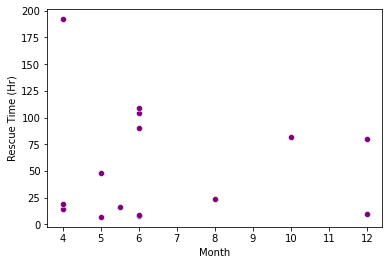

In [ ]:
# Plot a line graph for rescue time as per month 
RescueTime_Month = borewell_accident_df.groupby('Rescue Time (Hr)').mean().reset_index().drop(["Age","Year","Depth of borewell (ft)"],axis=1).sort_values(by='Month',ascending=True)
print(RescueTime_Month)
print(" ")
print("If survival rate is 0, it represents death")
print("If survival rate is 1, it represents survival")
print(" ")
sns.scatterplot(x='Month',y='Rescue Time (Hr)',data=RescueTime_Month,color='purple')